# PART I. RESEARCH QUESTION

# A1. PROPOSAL OF QUESTION


- Question: What factors determine which customers will cancel their subscriptions with telecommunication companies?
- Algorithm: The Decision Trees algorithm will be utilized to conduct this analysis.





# 







# A2. DEFINED GOAL
- I am conducting the analysis with the aim of building a predictive model that can determine the duration until a customer cancels their services with telecommunication companies, as well as identify the factors influencing their decision to do so.




# 





# PART II. METHOD JUSTIFICATION

# B1. EXPLANATION OF PREDICTION METHOD
- The decision tree algorithm is classified as a supervised learning algorithm. What sets this algorithm apart is its versatility in handling both regression and classification problems. In regression analysis, the decision tree utilizes a tree structure where each leaf node corresponds to a continuous label, while attributes are represented on the internal nodes. By traversing the branches based on attribute values, we proceed to the next node for comparison. (Sharma, 2022).

- For this particular analysis, it is preferable to have continuous feature values since it involves regression analysis. In case there are any string or categorical variables present, they will either be one hot encoded or excluded before constructing the model. Subsequently, the dataset is divided into training and test sets. The model is trained using the training set, where the entire training set is initially considered as the root. Based on attribute values, the records are recursively distributed. The decision tree algorithm applies statistical methods to order attributes into their respective nodes, ultimately leading to the formation of the final leaf node.



# 






# B2. SUMMARY OF METHOD ASSUMPTION
In the initial stages, the decision tree algorithm considers the entire training set as the root of the tree (Chauhan, 2022).



# B3. PACKAGES OR LIBRARIES LIST

 To produce visual representations of the data analysis by combining code and text reports, I will utilize Jupyter Notebook. For this data analysis, I have chosen Python because of its robustness in analyzing and summarizing data. Python is equipped with various libraries that enhance its functionality, save time, and reduce code complexity. Some of the libraries that are beneficial for this project include:

- Pandas, which facilitates the manipulation and analysis of data in rows and columns.
- Numpy, which enables the definition of arrays and complex matrices of all forms.
- Filterwarnings, which helps to ignore warning messages and enhances readability.
- Matplotlib and Seaborn, which are used to create data visualizations.
- Scikit-learn, which enable the development of statistical and predictive models.




# 



# PART III. DATA PREPARATION

# C1. DATA PREPROCESSING

 - My objective for preparing the data is to select only the attributes that are relevant to the regression model. 
 - In regression trees, quantitative variables are used and predicted based on the node splitting criteria employed by the model. Consequently, all qualitative data will either be converted into numerical data or excluded from the analysis.

# 






# C2. DATA SET VARIABLES

- During the analysis, the following data set attributes are identified in Section C3 Step 4. The independent attributes consist of both numerical and discrete features. 
- The continuous attributes include Email, Contacts, Yearly_equip_failure, Population, Children, Age, Income, Zip, Lat, Lng, Outage_sec_perweek, MonthlyCharge, and Bandwidth_GB_Year. 
- On the other hand, the discrete attributes are Port_modem, Tablet, Phone, Multiple, OnlineSecurity, Gender, Age, Marital, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Gender, Area, Marital, StreamingTV, StreamingMovies, PaperlessBilling, OnlineBackup, DeviceProtection, Churn, and TechSupport. 
- The dependent attribute, Tenure, is a continuous attribute.

# 





 
# C3. STEPS FOR ANALYSIS           
 
 The steps I will be using in preprocessing the data are:
 - Step 1:	First, import all the necessary Python libraries for the experiment.
 - Step 2:  Disable all warning messages to ensure better readability of the code.
 - Step 3:	Load the churn dataset as a pandas dataframe for data analysis and preprocessing
 - Step 4:  Examine the data types of all attributes and identify which ones will require further analysis.
 - Step 5:	To streamline the analysis, any string attributes deemed insignificant will be eliminated from the data.
 - Step 6:	Convert binary variables from "Yes" and "No" to “1” and “0” for consistency in the data.
 - Step 7:	One-hot encode these potential categorical attributes to enable their use in the regression analysis.
 - Step 8:	Split the dataset into predictor and response attributes. We will do so by categorizing all attributes except for the "Churn" variable as X and put them in an array. The "Churn" variable will be categorized as the y attribute array.

# 








# Step 1

In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Machine Learning and Model Analysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

# Disable Warnings
from warnings import filterwarnings

# 








# Step 2

In [2]:
filterwarnings('ignore')

# 





# Step 3. 

In [3]:
churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None

churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


#  




# Step 4

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# 






# Step 5

In [5]:
columns_to_drop = ['UID', 'Customer_id', 'Interaction', 'CaseOrder', 'State', 'City', 'County']

churn_data = churn_data.drop(columns_to_drop, axis = 1)

# 






# Step 6

In [6]:
categorical_cols = ['Churn', 'TechSupport', 'Techie',  'StreamingTV', 'Multiple', 'Port_modem',  'DeviceProtection',  
                    'OnlineSecurity', 'Phone', 'StreamingMovies', 'PaperlessBilling', 'Tablet',  'OnlineBackup']

churn_data[categorical_cols] = churn_data[categorical_cols].replace(to_replace = ['Yes', 'No'], value = [1, 0])

# 





# Step 7

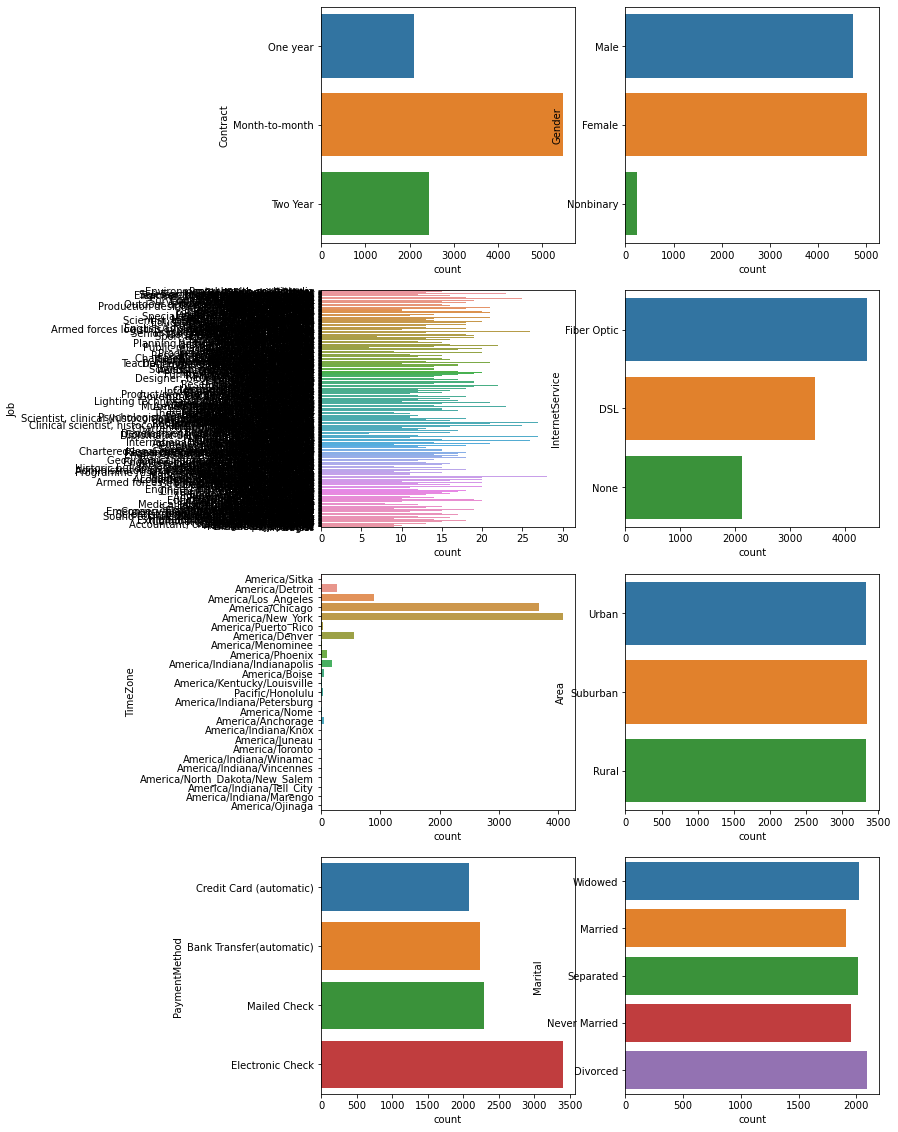

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

columns = ['Contract', 'Gender', 'Job', 'InternetService', 'TimeZone', 'Area', 'PaymentMethod', 'Marital']

for i, col in enumerate(columns):
    if i < 8:
        plt.subplot(4, 2, i+1)
        sns.countplot(data=churn_data, y=col)
    else:
        plt.subplot(4, 2, i+2)
        sns.countplot(data=churn_data, y=col)

plt.show()

Based on the above visualization, it appears that the Timezone and Job attributes have multiple potential categories that could be separated and as such should also be dropped. On the other hand, the remaining categorical attributes meet our criteria and will be subjected to one hot encoding.

In [8]:
columns_to_drop = ['Job', 'TimeZone']

churn_data = churn_data.drop(columns_to_drop, axis = 1)

In [9]:
#(Reference: G2)
# Generate individual variables for each categorical attribute, assigning 0 to rows where the value is absent and 
# 1 where it is present.

churn_data = pd.get_dummies(data=churn_data, columns=['Marital', 'Area', 'Gender', 'InternetService', 
                                                    'PaymentMethod', 'Contract'])

In [10]:
churn_data.head()

,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Area_Rural,Area_Suburban,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,99927,56.25100,-133.37571,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,48661,44.32893,-84.24080,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
2,97148,45.35589,-123.24657,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
3,92014,32.96687,-117.24798,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
4,77461,29.38012,-95.80673,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0


# 





# Step 8

In [11]:
y_attr = ['Churn']

X = churn_data.drop(y_attr, axis = 1)
y = churn_data['Churn'].values

# 





#  C4. CLEANED DATA SET

In [12]:
#(Reference: G3)

churn_data.to_csv('churn_clean_data_final.csv', index = False, encoding = 'utf-8')

#     





# Part IV: Analysis

# D1. SPLITTING THE DATA

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.3)

In [14]:
churn_data_cols = churn_data.loc[:, churn_data.columns != 'Churn']
columns = churn_data_cols.columns

churn_data_X_train = pd.DataFrame(X_train, columns=columns)
churn_data_X_test = pd.DataFrame(X_test, columns=columns)
churn_data_y_train = pd.DataFrame(y_train, columns=['Churn'])
churn_data_y_test = pd.DataFrame(y_test, columns=['Churn'])

# Save the test and training data as CSV files
churn_data_X_train.to_csv('churn_data_X_train.xlsx', encoding = 'utf-8', index = False)
churn_data_X_test.to_csv('churn_data_X_test.xlsx', encoding = 'utf-8', index = False)
churn_data_y_train.to_csv('churn_data_y_train.xlsx', encoding = 'utf-8', index = False)
churn_data_y_test.to_csv('churn_data_y_test.xlsx', encoding = 'utf-8', index = False)

# D2. OUTPUT AND INTERMEDIATE CALCULATIONS

Instead of using screenshots, all intermediate calculations will be carried out within the code blocks labeled as D3 for this analysis.

To conduct a regression analysis experiment using this dataset, the following steps will be executed instead of using screenshots:

- Step 1: Develop a regression tree model, train it using the dataset, and perform calculations for accuracy and Mean Squared Error (MSE).
- Step 2: Conduct an in-depth analysis to evaluate the significance of features in the model.
- Step 3: Fine-tune the model by adjusting hyperparameters and generate a selection of optimal parameters.
- Step 4: Utilize the optimal parameters to build a new model using the 10 most significant features 
- Step 5: Compare its performance against the initial model.

# 




# D3. CODE EXECUTION

In [15]:
# Generate Regression Tree model object (Reference: G6)
r_tree = DecisionTreeRegressor(random_state=50, criterion="squared_error", min_samples_split=3) 


# Fit model to training data 
r_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=3, random_state=50)

In [16]:
#Predicting X_test values

y_pred = r_tree.predict(X_test) 

In [17]:
# MSE of Initial model (Reference: G7)   
ms_error = MSE(y_test,y_pred)  
print('The initial model has a MSE of {:.2f} on the test set'.format(ms_error))


print('\n')

# Accuracy of Initial model
accu = r_tree.score(X_test,y_test)
print('The initial model has an accuracy of {:.2f}% on the test set'.format(accu*100))

The initial model has a MSE of 0.17 on the test set


The initial model has an accuracy of 11.92% on the test set


In [18]:
# Pandas Series using feature importance  (Reference: G4)
fi_data = pd.Series(index= X_train.columns, data=r_tree.feature_importances_)


#Features are sorted in ascending order
fi_data_sorted = fi_data.sort_values() 

# Output Pandas Series of Sorted Features
fi_data_sorted 

Contract_Two Year                         0.000000
Contract_One year                         0.000784
Area_Suburban                             0.000809
Area_Urban                                0.000838
Area_Rural                                0.001094
Marital_Widowed                           0.001103
PaperlessBilling                          0.001197
DeviceProtection                          0.001232
Gender_Female                             0.001340
Marital_Never Married                     0.001443
OnlineBackup                              0.001540
Phone                                     0.001575
Marital_Married                           0.001714
Port_modem                                0.001782
PaymentMethod_Bank Transfer(automatic)    0.001816
Gender_Nonbinary                          0.001993
OnlineSecurity                            0.002032
StreamingMovies                           0.002465
PaymentMethod_Mailed Check                0.002482
Tablet                         

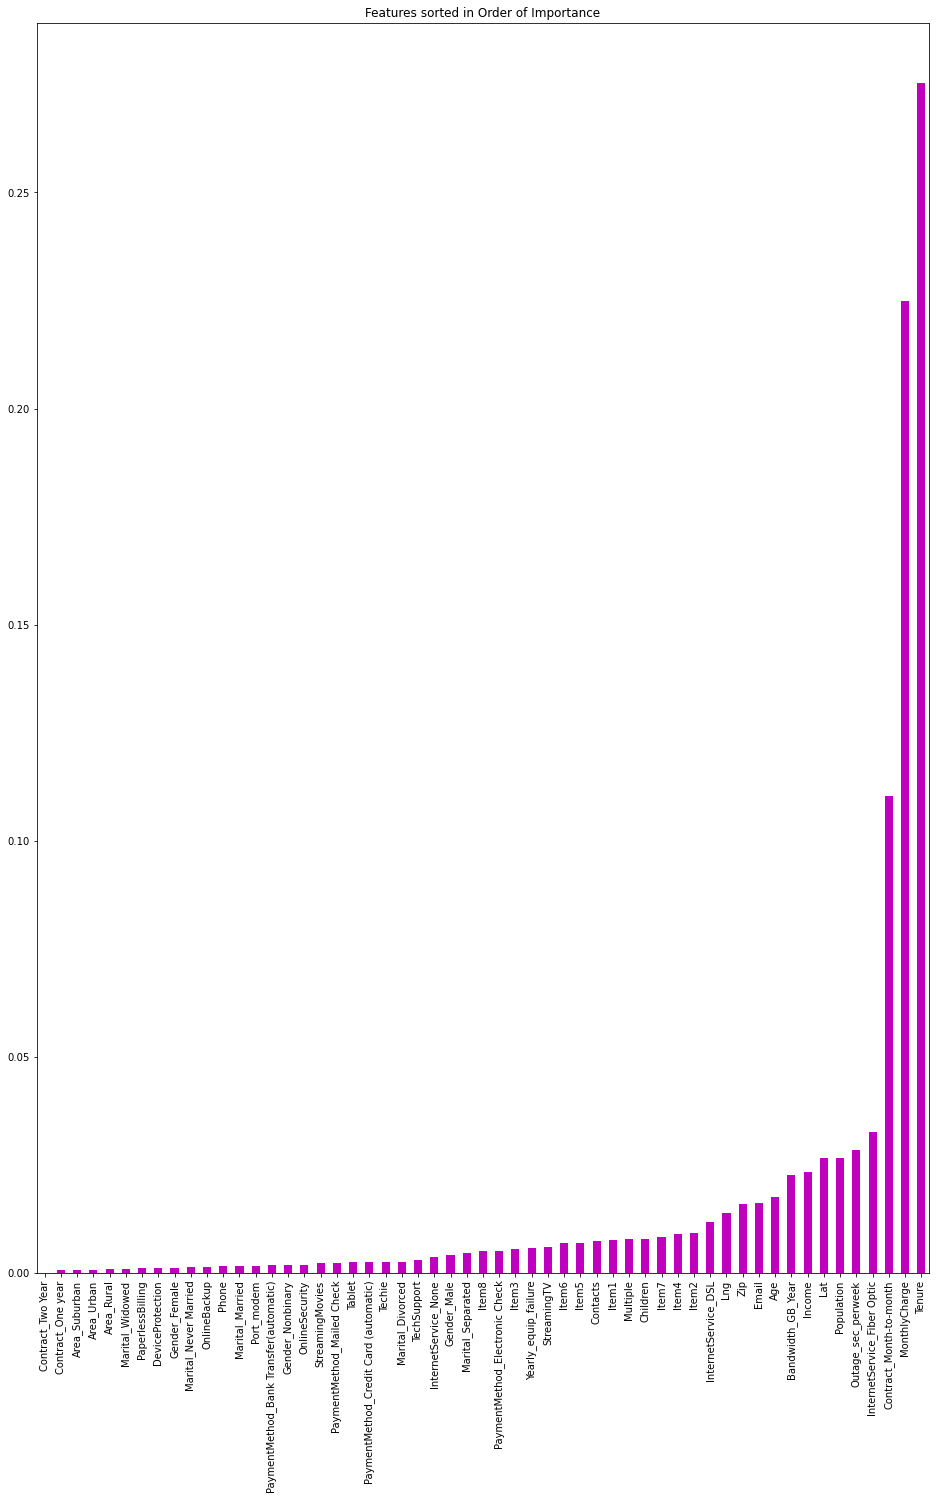

In [19]:
# Bar plot of feature importances sorted in ascending order

plt.figure(figsize=(16,23))  
fi_data_sorted.plot(color='m', kind='bar')
plt.title('Features sorted in Order of Importance')
plt.show()

In [20]:
# Tuning Hyperparameters to create an optimum  model  (Reference: G5)
parameters = {'max_features': ['auto', 'log2', 'sqrt'], 'max_depth':[5,10,15], 
              'min_samples_split':[2,10,30]}

# Building optimum model
gcv = GridSearchCV(estimator=r_tree, param_grid=parameters, cv=10,  verbose=1, 
                   scoring='neg_mean_squared_error',  n_jobs=-1)

# Top 10 Features
top10 = fi_data_sorted[-10:].index

#Fit optimum model to training data
gcv.fit(X_train[top10], y_train)  

#Calculate best estimators
r_tree_opt = gcv.best_estimator_
r_tree_opt

Fitting 10 folds for each of 27 candidates, totalling 270 fits


DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=50)

# 







# PART V: Data Summary and Implications

# E1. ACCURACY AND MSE

In [21]:
# Accuracy of Final model

accu = r_tree_opt.score(X_test[top10],y_test)
print('The optimum model has an accuracy of {:.2f}% on the test set'.format(accu*100))

The optimum model has an accuracy of 54.45% on the test set


In [22]:
# MSE of Initial model (Reference: G7) 

y_pred = r_tree_opt.predict(X_test[top10])
ms_error = MSE(y_test,y_pred)  
print('The optimum model has a MSE of {:.2f} on the test set'.format(ms_error))

The optimum model has a MSE of 0.09 on the test set


- The initial model yielded a Mean Squared Error (MSE) of 0.17, whereas the optimized model resulted in a reduced MSE of 0.09.
- The initial model exhibited a low accuracy of 11.92%, indicating poor performance. However, after tuning the hyperparameters and deriving optimal values, the optimized model achieved a higher accuracy of 54.45%. Despite the improvement, the accuracy of this model is still considered low, as both models made inadequate predictions on the test set.
- Based on the aforementioned results, it can be inferred that higher model accuracy correlates with lower MSE values.

# 








# E2. RESULTS AND IMPLICATIONS

# Results
Based on the analysis results, it is evident that the models produced very low accuracies. Therefore, it is not recommended to rely on these models for making accurate predictions regarding the duration of customer retention for network companies.




# Implications
Given the low accuracies observed in the models and the limitations in their predictive capabilities, it is cautioned that the current models may not provide reliable insights for predicting customer subscription durations accurately. However, further analysis can still be conducted to properly identify factors that contribute to longer customer memberships and those that result in quicker churns. By analyzing the data and considering these factors, network companies can then take steps to mitigate churn and encourage longer customer memberships.



# 

# E3. LIMITATION

The model's limitation becomes apparent as we observe consistently low accuracies in both the initial and optimized models. These results highlight the unreliable predictive performance of the model, raising concerns about its effectiveness in accurately predicting customer subscription durations. It is crucial to consider alternative approaches or further improve the model's design to ensure more accurate predictions in the future.

# 






# E4. COURSE OF ACTION

Considering the limitations of the current model in accurately predicting customer tenure and identifying crucial features, it is imperative for stakeholders to ensure further analyses are perfromed in oder to produce better models which can accurately achieve the objective of this experiment. This can be done by either exploring different data wrangling methods or other regression models that ultimately lead to creating an accurate predictive model.

# 



# F. PANOPTO RECORDING

# G. SOURCES OF THIRD-PARTY CODE

 - G1. https://stackoverflow.com/questions/40389018/dropping-multiple-columns-from-a-data-frame-using-python
 - G2. https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
 - G3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
 - G4. https://predictivehacks.com/feature-importance-in-python/
 - G5. https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier
 - G6. https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
 - G7. https://stackoverflow.com/questions/60627942/sklearn-metrics-units-of-measurement-of-accuracy-mean-absolut-error-mean-squar

# H. SOURCES

 - H1. Sharma A. (February 1, 2020) Decision Tree Introduction with example. Retrieved March 24, 2022 from https://www.geeksforgeeks.org/decision-tree-introduction-example/
 
 - Chauhan N S. (February 9, 2022) Decision Tree Algorithm Explained. Retrieved March 24, 2022 from https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html